In [1]:
import numpy as np
import pandas as pd
import joblib

from chem_wasserstein.ElM2D_ import ElM2D
import umap

from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [16]:
df = pd.read_excel('estm.xlsx')
df

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,27766.0,0.6300,0.000336,0.159985,10.1002/adfm.201806558
1,BiSb(Se0.92Br0.08)3,400.0,-138.00,23883.0,0.5700,0.000455,0.319177,10.1002/adfm.201806558
2,BiSb(Se0.92Br0.08)3,500.0,-163.00,20850.0,0.5300,0.000554,0.522607,10.1002/adfm.201806558
3,BiSb(Se0.92Br0.08)3,600.0,-181.00,19000.0,0.5100,0.000622,0.732305,10.1002/adfm.201806558
4,BiSb(Se0.92Br0.08)3,700.0,-193.00,17925.0,0.5000,0.000668,0.940000,10.1002/adfm.201806558
...,...,...,...,...,...,...,...,...
5200,Ge9Sb2Te12,423.0,77.28,173636.0,2.8586,0.001037,0.153448,https://doi.org/10.1021/acsami.0c02155
5201,Ge9Sb2Te12,525.0,97.50,136364.0,2.7576,0.001296,0.246795,https://doi.org/10.1021/acsami.0c02155
5202,Ge9Sb2Te12,625.0,112.88,120000.0,2.8232,0.001529,0.338496,https://doi.org/10.1021/acsami.0c02155
5203,Ge9Sb2Te12,725.0,135.19,108182.0,2.5354,0.001977,0.565374,https://doi.org/10.1021/acsami.0c02155


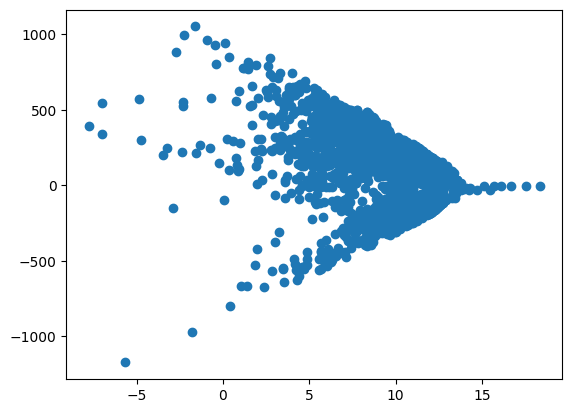

In [47]:
plt.scatter(np.log(df['electrical_conductivity(S/m)']), df['seebeck_coefficient(μV/K)'])

In [17]:
mapper = ElM2D(metric='mod_petti')
mapper.fit(df["Formula"])

Fitting mod_petti kernel matrix
Constructing distances


In [41]:
def plot_embeddings(x, y, size, formula):

    size_scale = 100

    # Create a DataFrame with additional information for hover
    df = pd.DataFrame({
        'x': x,
        'y': y,
        'size': size,
    })
    
    # Create an interactive scatter plot
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=df['x'],
        y=df['y'],
        mode='markers',
        marker=dict(
            color=df['y'],
            size=size/size_scale,
            colorscale='Viridis',
            showscale=True,
        ),
        customdata=df['size'],
        text=formula,
        hovertemplate="""
        Formula: %{text}<br>
        ZT: %{y:.2f}<br>
        Temp: %{customdata:.1f}
        <extra></extra>
        """
    ))
    
    # Update layout with title and axis labels
    fig.update_layout(
        title='Thermoelectrics',
        xaxis_title='UMAP',
        yaxis_title='ZT',
        hovermode='closest',
        width=1000,
        height=800
    )
    
    # Show the plot
    fig.show()

C:\Users\lowka\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1865: UserWarning:

using precomputed metric; inverse_transform will be unavailable



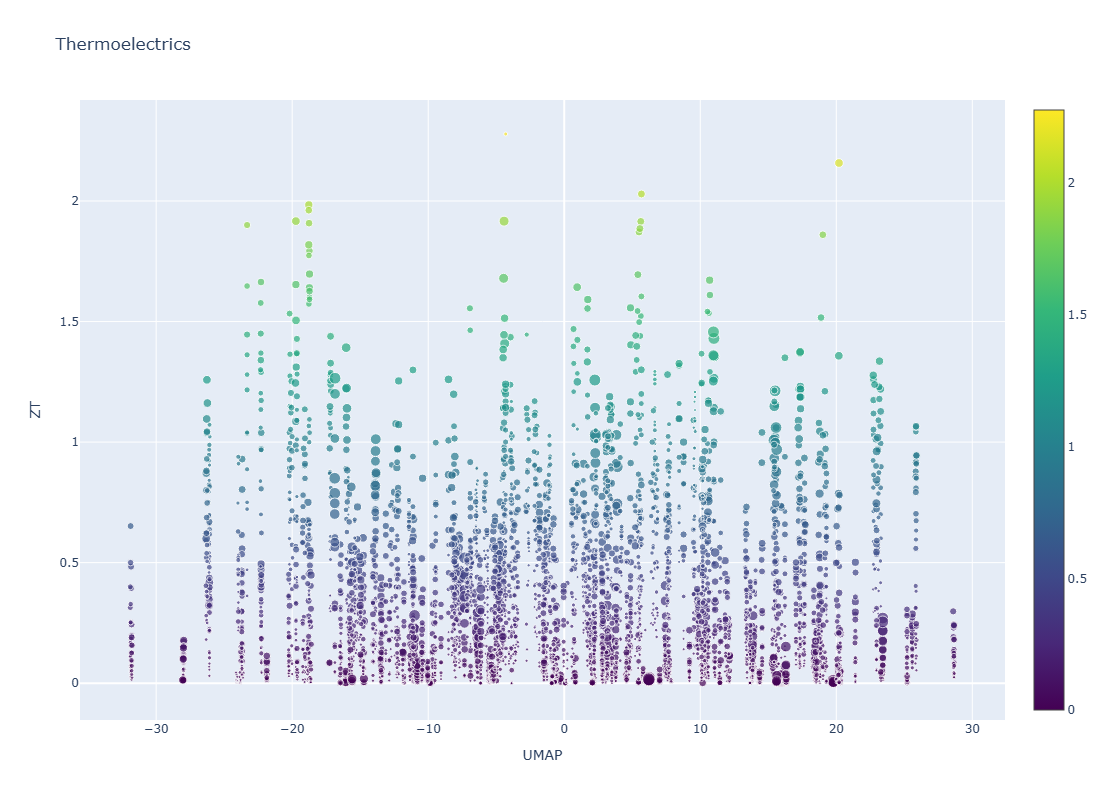

In [42]:
fit = umap.UMAP(metric='precomputed')
u = fit.fit_transform(mapper.dm, n_components=1, n_neighbours=20, min_dist=0.9)
plot_embeddings(u[:,0], df["ZT"],  df['temperature(K)'], df['Formula'])